In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import importlib
importlib.import_module('mpl_toolkits.mplot3d').Axes3D

mpl_toolkits.mplot3d.axes3d.Axes3D

## Load And Visualise Data
- Load
- Visualise
- Normalise

In [4]:
x = pd.read_csv('./Training Data/Linear_X_train.csv')
y = pd.read_csv('./Training Data/Linear_Y_train.csv')

In [5]:
x = x.values
y = y.values

x.shape, y.shape

((3750, 1), (3750, 1))

In [7]:
# Normalisation
u = x.mean()
std = x.std()
x = (x-u)/std

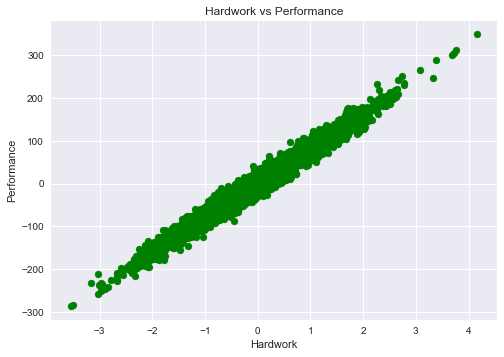

In [12]:
plt.style.use('seaborn')
plt.scatter(x, y, color='green')
plt.title('Hardwork vs Performance')
plt.ylabel("Performance")
plt.xlabel('Hardwork')
plt.show()

## Linear Regression

In [13]:
def hypothesis(x, theta):
    y_ = theta[0] + theta[1]*x
    return y_

In [19]:
def gradient(X, Y, theta):
    N = X.shape[0]
    grad = np.zeros((2,))
    
    for i in range(N):
        x = X[i]
        y_ = hypothesis(x, theta)
        y = Y[i]
        grad[0] += (y_-y)
        grad[1] += (y_-y)*x
    
    return grad/N

In [28]:
def error(X, Y, theta):
    N = X.shape[0]
    total_error = 0.0
    
    for i in range(N):
        y_ = hypothesis(X[i], theta)
        total_error += (y_-Y[i])**2
        
    return total_error/N

In [29]:
def gradient_descent(X, Y, max_steps=100, learning_rate=0.1):
    theta = np.zeros((2, ))
    error_list = []
    theta_list = []
    
    for i in range(max_steps):
        grad = gradient(X, Y, theta)
        e = error(X, Y, theta)[0]
        
        theta[0] = theta[0] - learning_rate*(grad[0])
        theta[1] = theta[1] - learning_rate*(grad[1])
        theta_list.append((theta[0], theta[1]))
        error_list.append(e)
    
    return theta, theta_list, error_list

In [30]:
theta, theta_list, error_list = gradient_descent(x, y)

In [31]:
theta

array([ 0.6838508 , 79.90361453])

In [35]:
# theta_list

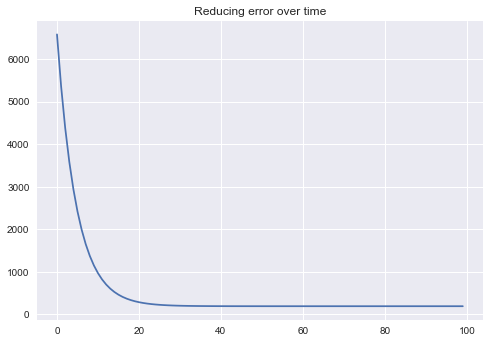

In [34]:
plt.plot(error_list)
plt.title("Reducing error over time")
plt.show()

## Prediction 

In [38]:
y_ = hypothesis(x, theta)

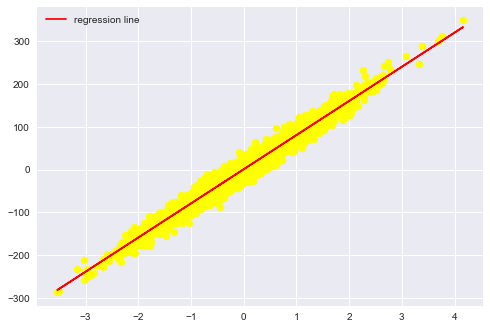

In [43]:
plt.scatter(x, y, color='yellow')
plt.plot(x, y_, color="red", label="regression line")
plt.legend()
plt.show()

In [44]:
x_test = pd.read_csv('./Test Cases/Linear_X_test.csv')
y_pred = hypothesis(x_test, theta)

## Score

In [45]:
def score(y_pred, y):
    num = np.sum((y-y_pred)**2)
    den = np.sum((y-y.mean())**2)
    score = 1-num/den
    
    return score*100

In [47]:
score(y_, y)

97.09612226971643

## Visualise Loss Function and Gradient Descent Trajectory

In [48]:
theta

array([ 0.6838508 , 79.90361453])

In [50]:
T0 = np.arange(-40, 40, 1)
T1 = np.arange(40, 120, 1)

T0, T1 = np.meshgrid(T0, T1)
J = np.zeros(T0.shape)

for i in range(J.shape[0]):
    for j in range(J.shape[1]):
        y_ = T1[i, j]*x + T0[i, j]
        J[i, j] = np.sum((y-y_)**2)/y.shape[0]

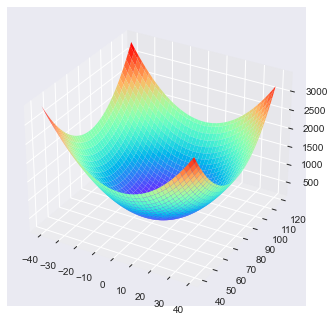

In [51]:
fig = plt.figure()
axes = fig.gca(projection='3d')
axes.plot_surface(T0, T1, J, cmap='rainbow')
plt.show()

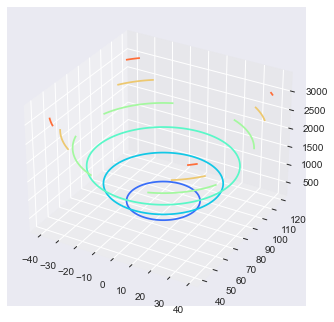

In [52]:
fig = plt.figure()
axes = fig.gca(projection='3d')
axes.contour(T0, T1, J, cmap='rainbow')
plt.show()

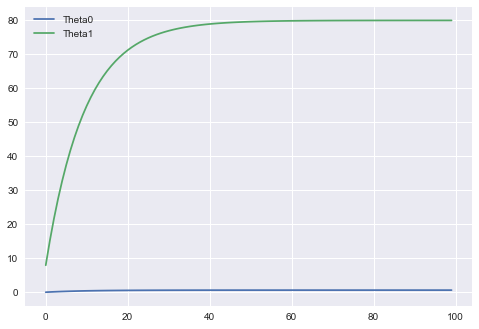

In [53]:
theta_list = np.array(theta_list)
plt.plot(theta_list[:, 0], label='Theta0')
plt.plot(theta_list[:, 1], label="Theta1")
plt.legend()
plt.show()

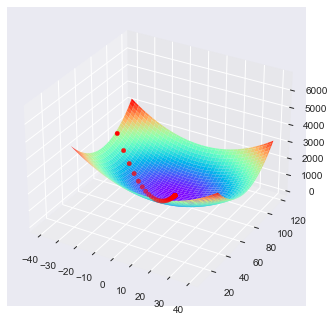

In [56]:
fig = plt.figure()
axes = fig.gca(projection='3d')
axes.plot_surface(T0, T1, J, cmap='rainbow')
axes.scatter(theta_list[:,0], theta_list[:,1], error_list, color="red")
plt.show()

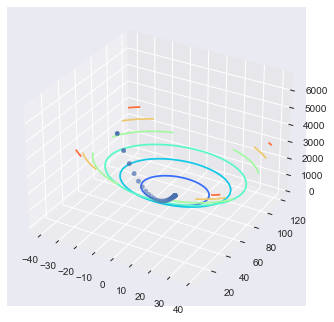

In [57]:
fig = plt.figure()
axes = fig.gca(projection='3d')
axes.contour(T0, T1, J, cmap='rainbow')
axes.scatter(theta_list[:,0], theta_list[:, 1], error_list)
plt.show()

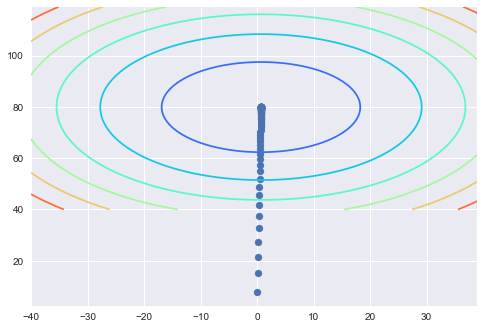

In [59]:
plt.contour(T0, T1, J, cmap='rainbow')
plt.scatter(theta_list[:,0], theta_list[:, 1])
plt.show()